In [ ]:
#Import libraries
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
#Make a dataframe to read the data in DataSource1.csv
transactionsDf = pd.read_csv("DataSource1.csv")
transactionsDf.head(5)

,Retailer country,Retailer type,Order method type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin,Retailer ID
0,Australia,Department Store,Telephone,Camping Equipment,Cooking Gear,TrailChef Water Bag,2012,Q1 2012,10824.30,1710,0.537125,2
1,Australia,Department Store,Telephone,Camping Equipment,Cooking Gear,TrailChef Canteen,2012,Q1 2012,7007.23,799,0.496009,9
2,Australia,Department Store,Telephone,Camping Equipment,Cooking Gear,TrailChef Cup,2012,Q1 2012,2785.84,776,0.763231,2
3,Australia,Department Store,Telephone,Camping Equipment,Cooking Gear,TrailChef Kettle,2012,Q1 2012,38896.65,4905,0.496847,4
4,Australia,Department Store,Telephone,Camping Equipment,Tents,Star Gazer 6,2012,Q1 2012,18176.67,23,0.379974,3


In [3]:
#Make a dataframe to read the data in DataSource2.csv
salesDf = pd.read_csv("DataSource2.csv")
salesDf.head(5)

,Gender,Name,Hours Worked,SalesTraining,Years Experience,Staff Id,Shop Id
0,M,Pricha,39.0,N,3.0,1.0,17.0
1,M,Li,46.0,N,3.0,2.0,106.0
2,F,Erity,42.0,Y,4.0,3.0,113.0
3,M,Bayana,38.0,Y,5.0,4.0,235.0
4,M,Yongnian,33.0,N,4.0,5.0,278.0


In [4]:
#Check whether there are null values in the data frames created.
print(transactionsDf.isnull().sum())
print('\n')
print(salesDf.isnull().sum())

Retailer country       0
Retailer type          0
Order method type      0
Product line           0
Product type           0
Product                0
Year                   0
Quarter                0
Revenue                0
Quantity               0
Gross margin         581
Retailer ID            0
dtype: int64


Gender               4
Name                10
Hours Worked         3
SalesTraining        3
Years Experience     3
Staff Id             3
Shop Id              3
dtype: int64


In [5]:
#Question a-(i)
#Which are the top three performing retailer countries in terms of revenue and gross margin? 
#What are the amounts achived during the period?

#Although there are null values in "Gross margin" column, we do not need to remove 
#the rows containing thoses values since the question asks us to find the top three performing retailer 
#countries in terms of revenue and gross margin which are unilateral.

#first let's find the top three performing retailer countries in terms of "Revenue".
revDf = transactionsDf.groupby(['Retailer country'])['Revenue'].sum().reset_index()
revDf.sort_values(by=['Revenue'], inplace=True,ascending=False)
print(revDf.iloc[:3])

#put a gap
print('\n')

#Next let's find the top three performing retailer countries in terms of "Gross margin".
grossDf = transactionsDf.groupby(['Retailer country'])['Gross margin'].sum().reset_index()
grossDf.sort_values(by=['Gross margin'], inplace=True,ascending=False)
print(grossDf.iloc[:3])

   Retailer country       Revenue
20    United States  6.508110e+08
11            Japan  2.816655e+08
5             China  2.488232e+08


   Retailer country  Gross margin
20    United States   3348.866446
4            Canada   2662.767825
8            France   2590.572647


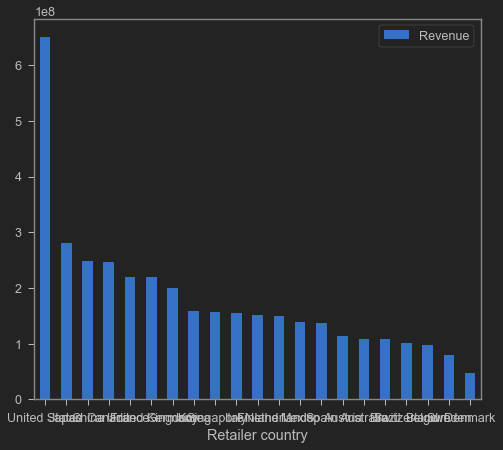

In [6]:
#Matplotlib plot of "Top Revenue"
revDf.plot.bar(x="Retailer country",y="Revenue",rot=0)

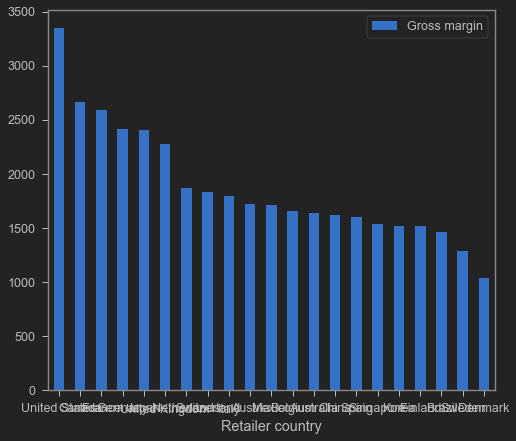

In [7]:
#Matplotlib plot of "Top gross margin"
grossDf.plot.bar(x="Retailer country",y="Gross margin",rot=0)

In [8]:
#Question a-(ii)
#What are the top three profitable products sold? What are the
#top three countries that sold each of these products?

#We have to find the top three products with most revenue.
productDf = transactionsDf.copy()
productDf.sort_values(by=['Revenue'], inplace=True,ascending=False)
print(productDf.iloc[0:3,[0,5,8]]) #Add 3 and 4 in the second list inside iloc if you want "Product line" and "Product type" too.

      Retailer country                       Product     Revenue
81777    United States  Hailstorm Titanium Woods Set  1635687.96
81704    United States                  Star Gazer 2  1486717.10
82315    United States                     Star Lite  1415141.91


In [ ]:
#Matplotlib plot of "profitable product"
productDf.plot.bar(x="Product",y="Revenue",rot=0)

KeyboardInterrupt: 

In [ ]:
#Question a-(iii)
#Which is the most productive order method(i.e. the average revenue is higher?)
orderMethodDf = transactionsDf.groupby(['Order method type'])['Revenue','Quantity'].sum().reset_index()
orderMethodDf['avgRevenue']= np.where(orderMethodDf['Quantity'] < 1, orderMethodDf['Quantity'], orderMethodDf['Revenue']/orderMethodDf['Quantity'])
orderMethodDf.sort_values(by=['avgRevenue'], inplace=True,ascending=False)
print(orderMethodDf.iloc[0:3,[0,1,3]])

In [ ]:
#Matplotlib plot of "order method"
ax = orderMethodDf.plot.bar(x="Order method type",y="avgRevenue",rot=0)

In [ ]:
#Question b-(i)
#By further enchancing your program in Question Q4(a), formulate new funcitons that answer the following questions.
#Gross margin contribution is defined as margin(%) multiplied by revenue.
#Using this formula, find out what is the gross margin contribution amount(i.e. in $)
#per employee for the top performing Retailer(by gross margin amount) in each country?

salesDf=salesDf.dropna(how='all')
empDf=salesDf.groupby(['Shop Id'])["Staff Id"].count().reset_index()
empDf["empCount"]=empDf["Staff Id"]
empDf["Retailer ID"]=empDf["Shop Id"]
empDf["Retailer ID"]=empDf["Retailer ID"].astype(int)
empDf=empDf.drop(columns=["Staff Id", "Shop Id"])

retailerDf = transactionsDf.groupby(["Retailer country","Retailer ID"])["Revenue", "Gross margin"].sum().reset_index()

#retailerDf["Retailer country"] = retailerDf["Retailer country"].apply(lambda col: col[1].str([0]))
concatDf= pd.merge(retailerDf,empDf,on='Retailer ID')

#calculate gross margin revenue
concatDf['gmRev']=np.where(concatDf['Revenue'] < 1, concatDf['Revenue'], concatDf['Revenue']*concatDf['Gross margin'])
#calculatr gross margin revenue per employee
concatDf['gmRevEmp']=np.where(concatDf['empCount'] < 1, concatDf['empCount'], concatDf['gmRev']/concatDf['empCount'])
concatDf.sort_values(by=['gmRevEmp'], inplace=True,ascending=False)

#Since we want the top retail id from each country, we are going to remove the duplicates based on "Retail country"
retailTopDf = concatDf.copy()
retailTopDf=retailTopDf.drop_duplicates(subset=["Retailer country"],keep="first",inplace=False)
#Since we only want "Retailer country" and "Retailer ID" we will drop the other columns
retailTopDf=retailTopDf.drop(columns=["Revenue","Gross margin","empCount","gmRev","gmRevEmp"])
print(retailTopDf)

In [ ]:
#Question b-(ii)
#What is the average working experience of staff in each country?

expDf=salesDf.groupby(['Shop Id'])["Years Experience"].sum().reset_index()
expDf["Shop Id"]=expDf["Shop Id"].astype(int)
transDf=transactionsDf.copy()
transDf['Shop Id']=transDf["Retailer ID"]
transDf=transDf.drop(columns="Retailer ID")
df = pd.merge(expDf,transDf,on="Shop Id")
#Since all the shops having the "same id" has gained the "years experience" same
df=df.drop_duplicates(subset=["Shop Id"],keep="first",inplace=False)
avgExpDf = df.groupby(["Retailer country"])["Years Experience"].mean().reset_index()
avgExpDf["average experience"]=avdExpDf["Years Experience"]
avgExpDf=avgExpDf.drop(columns=["Years Experience"])
print(avgExpDf)

In [ ]:
#Question b-(iii)
#What is the total working hours of staff in each retail store?

workingHrsDf = salesDf.groupby(['Shop Id'])["Hours Worked"].sum().reset_index()
workingHrsDf['Shop Id']=workingHrsDf['Shop Id'].astype(int)
print(workingHrsDf)

In [ ]:
#Question - c
#The sales director is considering investing in more sales training or hiring more experience
#staff to improve sales. What would you suggest and why?

#Looking at the above results we can deduce that the companies with more machinery rather than employees
#have been earning a considerable revenue than the companies which are prioritizing the employees over machinery.
#And if the company we are considering is not a machine based company we can say that thses datasets are biased because this dataset even have companies with one employee. 